In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import random

In [14]:
file_path = "netcdf_files/southern-ocean-chla-uniform.nc"

# Open the NetCDF file
ds = xr.open_dataset(file_path)
ds

<xarray.Dataset> Size: 513MB
Dimensions:           (N_PROF: 47277, PRES_ADJUSTED: 401)
Coordinates:
  * N_PROF            (N_PROF) int32 189kB 0 1 2 3 4 ... 49518 49519 49520 49521
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1990 1995 2000
    JULD              (N_PROF) datetime64[ns] 378kB ...
    LATITUDE          (N_PROF) float64 378kB ...
    LONGITUDE         (N_PROF) float64 378kB ...
Data variables:
    POSITION_QC       (N_PROF) |S1 47kB ...
    TEMP_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 152MB ...
    TEMP_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 19MB ...
    PSAL_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 152MB ...
    PSAL_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 19MB ...
    CHLA_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 152MB ...
    CHLA_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 19MB ...

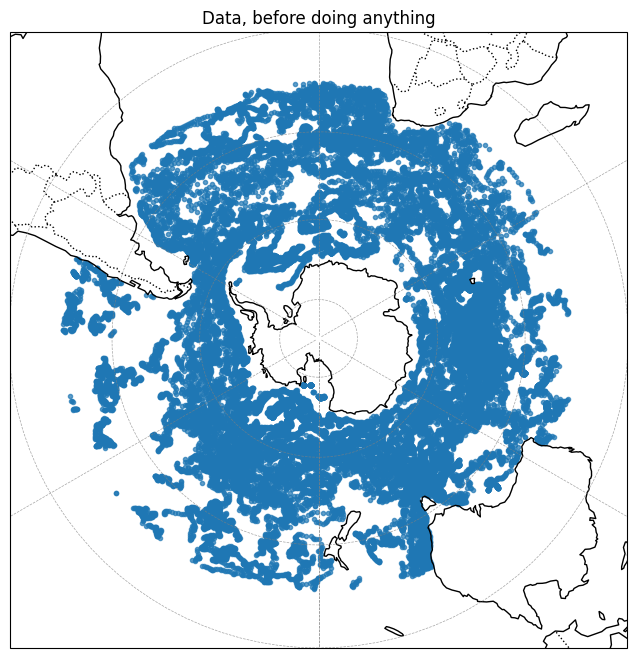

In [15]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Plot the geographic scatter map with Cartopy
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -20], crs=ccrs.PlateCarree())  # Define extent for better visualization

# Add scatter points for the clusters
scatter = plt.scatter(
    ds['LONGITUDE'],
    ds['LATITUDE'],
    alpha=0.7,
    marker='.',
    transform=ccrs.PlateCarree()
)

# Add features to the map
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')

# Add labels and title
plt.title("Data, before doing anything", fontsize=12)

# Show the plot
plt.show()


In [16]:
ds['CHLA_ADJUSTED'].sel(N_PROF=49521, method='nearest').values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [17]:
ds['CHLA_ADJUSTED_QC'].sel(N_PROF=7631, method='nearest').values

array([b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'1', b'', b'1', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', 

In [18]:
# dropping profiles based on QC flag

ds_dropped = ds.copy()
# ds_dropped = ds_dropped.where(ds_dropped['CHLA_ADJUSTED_QC'] != b'', drop=True)
ds_dropped = ds_dropped.where(ds_dropped['CHLA_ADJUSTED_QC'] != b'3', drop=True)
ds_dropped = ds_dropped.where(ds_dropped['CHLA_ADJUSTED_QC'] != b'4', drop=True)
ds_dropped

<xarray.Dataset> Size: 1GB
Dimensions:           (N_PROF: 47222, PRES_ADJUSTED: 401)
Coordinates:
  * N_PROF            (N_PROF) int32 189kB 0 1 2 3 4 ... 49518 49519 49520 49521
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1990 1995 2000
    JULD              (N_PROF) datetime64[ns] 378kB 2024-06-08T15:24:28.00164...
    LATITUDE          (N_PROF) float64 378kB -30.19 -30.48 ... -64.32 -64.44
    LONGITUDE         (N_PROF) float64 378kB -0.7675 -0.9496 ... 73.39 73.2
Data variables:
    POSITION_QC       (N_PROF, PRES_ADJUSTED) object 151MB b'1' b'1' ... b'1'
    TEMP_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 151MB nan 19.9 ... nan
    TEMP_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 151MB b'1' b'1' ... b'1'
    PSAL_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 151MB nan 35.94 ... nan
    PSAL_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 151MB b'1' b'1' ... b'1'
    CHLA_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 151MB nan 0.2017 ... nan
    CHLA_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 151MB b'5' b'5' ... b'2'

In [19]:
ds_dropped['CHLA_ADJUSTED'].sel(N_PROF=7631, method='nearest').values

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

In [20]:
limit = 400  # fill everything, we only have 400 levels

ds_interpolated = ds_dropped.copy()
ds_interpolated['CHLA_ADJUSTED'] = ds_interpolated['CHLA_ADJUSTED'].interpolate_na(dim='PRES_ADJUSTED', method='linear')
ds_interpolated['CHLA_ADJUSTED'] = ds_interpolated['CHLA_ADJUSTED'].bfill(dim='PRES_ADJUSTED', limit=limit)
ds_interpolated['CHLA_ADJUSTED'] = ds_interpolated['CHLA_ADJUSTED'].ffill(dim='PRES_ADJUSTED', limit=limit)
ds_interpolated

<xarray.Dataset> Size: 1GB
Dimensions:           (N_PROF: 47222, PRES_ADJUSTED: 401)
Coordinates:
  * N_PROF            (N_PROF) int32 189kB 0 1 2 3 4 ... 49518 49519 49520 49521
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1990 1995 2000
    JULD              (N_PROF) datetime64[ns] 378kB 2024-06-08T15:24:28.00164...
    LATITUDE          (N_PROF) float64 378kB -30.19 -30.48 ... -64.32 -64.44
    LONGITUDE         (N_PROF) float64 378kB -0.7675 -0.9496 ... 73.39 73.2
Data variables:
    POSITION_QC       (N_PROF, PRES_ADJUSTED) object 151MB b'1' b'1' ... b'1'
    TEMP_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 151MB nan 19.9 ... nan
    TEMP_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 151MB b'1' b'1' ... b'1'
    PSAL_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 151MB nan 35.94 ... nan
    PSAL_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 151MB b'1' b'1' ... b'1'
    CHLA_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 151MB 0.2017 ... nan
    CHLA_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) object 151MB b'5' b'5' ... b'2'

In [21]:
ds_interpolated.sel(N_PROF=13698, method='nearest')

<xarray.Dataset> Size: 24kB
Dimensions:           (PRES_ADJUSTED: 401)
Coordinates:
    N_PROF            int32 4B 13698
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1990 1995 2000
    JULD              datetime64[ns] 8B 2019-12-19T01:59:23.000193024
    LATITUDE          float64 8B -31.17
    LONGITUDE         float64 8B -133.8
Data variables:
    POSITION_QC       (PRES_ADJUSTED) object 3kB b'1' b'1' b'1' ... b'1' b'1'
    TEMP_ADJUSTED     (PRES_ADJUSTED) float64 3kB nan 19.33 19.08 ... nan nan
    TEMP_ADJUSTED_QC  (PRES_ADJUSTED) object 3kB b'1' b'1' b'1' ... b'1' b'1'
    PSAL_ADJUSTED     (PRES_ADJUSTED) float64 3kB nan 35.17 35.2 ... nan nan nan
    PSAL_ADJUSTED_QC  (PRES_ADJUSTED) object 3kB b'1' b'1' b'1' ... b'1' b'1'
    CHLA_ADJUSTED     (PRES_ADJUSTED) float64 3kB 0.0036 0.0036 ... 0.003688
    CHLA_ADJUSTED_QC  (PRES_ADJUSTED) object 3kB b'' b'' b'' ... b'1' b'1' b'1'

In [22]:
ds_interpolated.sel(N_PROF=49521, method='nearest')

<xarray.Dataset> Size: 24kB
Dimensions:           (PRES_ADJUSTED: 401)
Coordinates:
    N_PROF            int32 4B 49521
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1990 1995 2000
    JULD              datetime64[ns] 8B 2023-02-26T00:12:42.000010752
    LATITUDE          float64 8B -64.44
    LONGITUDE         float64 8B 73.2
Data variables:
    POSITION_QC       (PRES_ADJUSTED) object 3kB b'1' b'1' b'1' ... b'1' b'1'
    TEMP_ADJUSTED     (PRES_ADJUSTED) float64 3kB nan 0.6264 ... 0.3563 nan
    TEMP_ADJUSTED_QC  (PRES_ADJUSTED) object 3kB b'1' b'1' b'1' ... b'1' b'1'
    PSAL_ADJUSTED     (PRES_ADJUSTED) float64 3kB nan 33.67 33.67 ... 34.69 nan
    PSAL_ADJUSTED_QC  (PRES_ADJUSTED) object 3kB b'1' b'1' b'1' ... b'1' b'1'
    CHLA_ADJUSTED     (PRES_ADJUSTED) float64 3kB nan nan nan ... nan nan nan
    CHLA_ADJUSTED_QC  (PRES_ADJUSTED) object 3kB b'' b'' b'' ... b'' b'2' b'2'

In [23]:
chla = ds_interpolated['CHLA_ADJUSTED']
chla

<xarray.DataArray 'CHLA_ADJUSTED' (N_PROF: 47222, PRES_ADJUSTED: 401)> Size: 151MB
array([[0.201674  , 0.201674  , 0.201674  , ..., 0.007868  , 0.007868  ,
        0.007868  ],
       [0.147548  , 0.147548  , 0.147548  , ..., 0.00712226, 0.00660772,
        0.00660772],
       [0.21389601, 0.21389601, 0.21389601, ..., 0.00792448, 0.00835243,
        0.00835243],
       ...,
       [0.0432    , 0.0432    , 0.0432    , ..., 0.0432    , 0.0432    ,
        0.0432    ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * N_PROF         (N_PROF) int32 189kB 0 1 2 3 4 ... 49518 49519 49520 49521
  * PRES_ADJUSTED  (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1985 1990 1995 2000
    JULD           (N_PROF) datetime64[ns] 378kB 2024-06-08T15:24:28.00164403...
    LATITUDE       (N_PROF) float64 378kB -30.19 -30.48 -30.7 ... -64.32 -64.44
    LONGITUDE      (N_PROF) float64 378kB -0.7675 -0.9496 -0.8953 ... 73.39 73.2
Attributes:
    long_name:       Chlorophyll-A
    standard_name:   mass_concentration_of_chlorophyll_a_in_sea_water
    units:           mg/m3
    C_format:        %.4f
    FORTRAN_format:  F.4
    resolution:      0.025

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [25]:
chla_dropped = chla.dropna(dim='N_PROF', how='all')
chla_dropped

<xarray.DataArray 'CHLA_ADJUSTED' (N_PROF: 37320, PRES_ADJUSTED: 401)> Size: 120MB
array([[0.201674  , 0.201674  , 0.201674  , ..., 0.007868  , 0.007868  ,
        0.007868  ],
       [0.147548  , 0.147548  , 0.147548  , ..., 0.00712226, 0.00660772,
        0.00660772],
       [0.21389601, 0.21389601, 0.21389601, ..., 0.00792448, 0.00835243,
        0.00835243],
       ...,
       [0.1296    , 0.1296    , 0.1296    , ..., 0.1296    , 0.1296    ,
        0.1296    ],
       [0.61559999, 0.61559999, 0.61559999, ..., 0.61559999, 0.61559999,
        0.61559999],
       [0.0432    , 0.0432    , 0.0432    , ..., 0.0432    , 0.0432    ,
        0.0432    ]])
Coordinates:
  * N_PROF         (N_PROF) int32 149kB 0 1 2 3 4 ... 49493 49494 49512 49519
  * PRES_ADJUSTED  (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1985 1990 1995 2000
    JULD           (N_PROF) datetime64[ns] 299kB 2024-06-08T15:24:28.00164403...
    LATITUDE       (N_PROF) float64 299kB -30.19 -30.48 -30.7 ... -64.49 -64.43
    LONGITUDE      (N_PROF) float64 299kB -0.7675 -0.9496 ... 70.64 73.63
Attributes:
    long_name:       Chlorophyll-A
    standard_name:   mass_concentration_of_chlorophyll_a_in_sea_water
    units:           mg/m3
    C_format:        %.4f
    FORTRAN_format:  F.4
    resolution:      0.025

In [26]:
chla_cleaned_array = chla_dropped.values
profiles, pressure_levels = chla_cleaned_array.shape

chla_cleaned_array

array([[0.201674  , 0.201674  , 0.201674  , ..., 0.007868  , 0.007868  ,
        0.007868  ],
       [0.147548  , 0.147548  , 0.147548  , ..., 0.00712226, 0.00660772,
        0.00660772],
       [0.21389601, 0.21389601, 0.21389601, ..., 0.00792448, 0.00835243,
        0.00835243],
       ...,
       [0.1296    , 0.1296    , 0.1296    , ..., 0.1296    , 0.1296    ,
        0.1296    ],
       [0.61559999, 0.61559999, 0.61559999, ..., 0.61559999, 0.61559999,
        0.61559999],
       [0.0432    , 0.0432    , 0.0432    , ..., 0.0432    , 0.0432    ,
        0.0432    ]])

In [27]:
scaler = StandardScaler()
chla_scaled = scaler.fit_transform(chla_cleaned_array)

chla_scaled

array([[-0.05955433, -0.05963063, -0.06022974, ..., -0.07709109,
        -0.07708636, -0.077082  ],
       [-0.17901224, -0.17907837, -0.18006285, ..., -0.08521109,
        -0.09080882, -0.09080439],
       [-0.03257995, -0.03265854, -0.03317063, ..., -0.07647606,
        -0.07181172, -0.07180739],
       ...,
       [-0.21862408, -0.21868685, -0.21979912, ...,  1.24838775,
         1.24838419,  1.24838133],
       [ 0.85399434,  0.85384036,  0.85618834, ...,  6.54019831,
         6.54016164,  6.54012996],
       [-0.40931181, -0.40935837, -0.41108579, ...,  0.30762138,
         0.3076237 ,  0.30762597]])

In [28]:
pca = PCA()
chla_pca = pca.fit_transform(chla_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

sum = 0
for i in range(15):
    sum += explained_variance[i]
    print(f'{sum * 100} - {i + 1} Principal Components')

84.34032527109939 - 1 Principal Components
90.45808551173799 - 2 Principal Components
93.8958875301939 - 3 Principal Components
96.14588446892601 - 4 Principal Components
97.00072185934455 - 5 Principal Components
97.69210576614037 - 6 Principal Components
98.37931668195318 - 7 Principal Components
98.83731119468423 - 8 Principal Components
99.1711357120864 - 9 Principal Components
99.33213366614216 - 10 Principal Components
99.44087791019605 - 11 Principal Components
99.512563875786 - 12 Principal Components
99.57173384274645 - 13 Principal Components
99.62490839535165 - 14 Principal Components
99.67247256308904 - 15 Principal Components


In [39]:
n_components = 4
# n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

# Reduce data using the selected components
pca = PCA(n_components=n_components)
chla_reduced = pca.fit_transform(chla_scaled)

chla_reduced

array([[-1.59301072e+00,  4.40369046e-01,  6.41741591e-01,
        -7.13540640e-02],
       [-1.61804953e+00, -1.44085670e-01,  1.41561529e-01,
        -8.33152510e-03],
       [-1.71090763e+00,  2.17677236e-01,  5.53336962e-01,
        -6.33327229e-02],
       ...,
       [ 2.23800958e+01, -2.92316747e+00, -8.48337570e-01,
        -7.27710248e-02],
       [ 1.19124952e+02, -5.41678033e+00,  7.66761998e-01,
        -4.17342727e-01],
       [ 5.18100940e+00, -2.47985850e+00, -1.13546640e+00,
        -1.15138299e-02]])

In [111]:
from sklearn.mixture import GaussianMixture

# Perform GMM clustering with regularization
n_clusters = 6  # Adjust as needed
reg_covar_value = 1e-4  # Small regularization value to stabilize covariance matrices

gmm = GaussianMixture(n_components=n_clusters, reg_covar=reg_covar_value, random_state=42)
labels = gmm.fit_predict(chla_reduced)


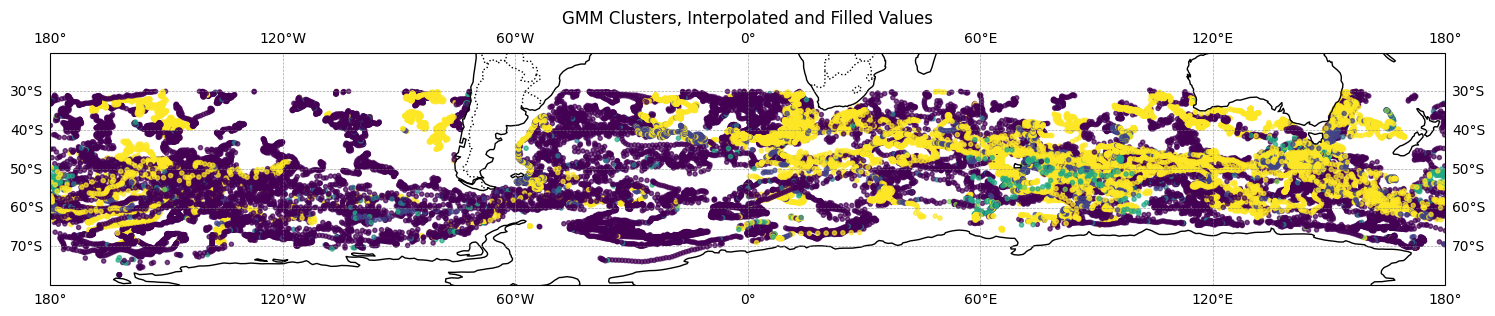

In [112]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Plot the geographic scatter map with Cartopy
plt.figure(figsize=(18, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -20, -80], crs=ccrs.PlateCarree())

# Add scatter points for the clusters
scatter = plt.scatter(
    chla_dropped['LONGITUDE'],
    chla_dropped['LATITUDE'],
    c=labels,
    cmap='viridis',
    alpha=0.7,
    marker='.',
    transform=ccrs.PlateCarree()
)

# Add features to the map
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')

# Add labels and title
plt.title("GMM Clusters, Interpolated and Filled Values", fontsize=12)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Show the plot
plt.show()

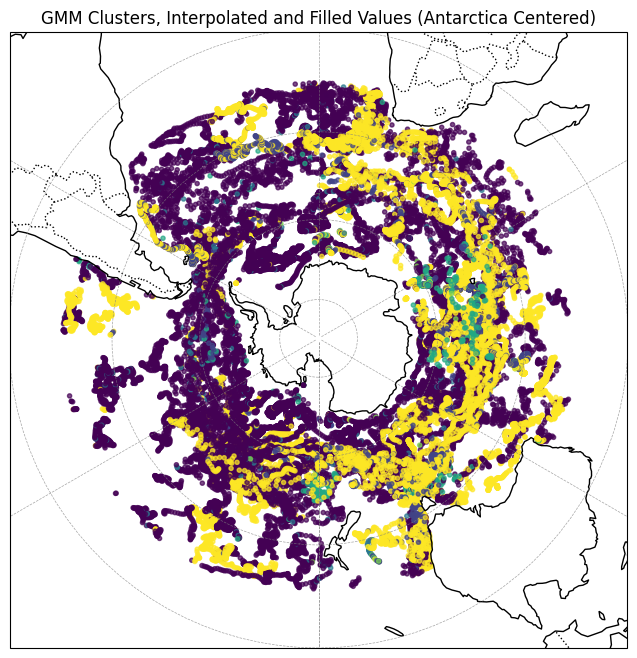

In [113]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Plot the geographic scatter map with Cartopy
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -20], crs=ccrs.PlateCarree())  # Define extent for better visualization

# Add scatter points for the clusters
scatter = plt.scatter(
    chla_dropped['LONGITUDE'],
    chla_dropped['LATITUDE'],
    c=labels,
    cmap='viridis',
    alpha=0.7,
    marker='.',
    transform=ccrs.PlateCarree()
)

# Add features to the map
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')

# Add labels and title
plt.title("GMM Clusters, Interpolated and Filled Values (Antarctica Centered)", fontsize=12)

# Show the plot
plt.show()


In [66]:
labels

array([5, 5, 5, ..., 3, 3, 3], dtype=int64)

In [114]:
from sklearn.mixture import GaussianMixture
import numpy as np

plot_labels = []
ssd = []  # List to store sum of squared distances
N = 10

from sklearn.mixture import GaussianMixture
reg_covar_value = 1e-4  # Small regularization value to stabilize covariance matrices


for n in range(1, N + 1):
    # Perform GMM clustering
    n_clusters = n
    gmm = GaussianMixture(n_components=n_clusters, reg_covar=reg_covar_value, random_state=42)
    labels = gmm.fit_predict(chla_reduced)
    plot_labels.append(labels)

    # Calculate sum of squared distances (SSD)
    # Compute cluster centers
    centers = gmm.means_
    
    # Compute SSD for each cluster and sum them
    distances = np.linalg.norm(chla_reduced - centers[labels], axis=1)**2
    ssd.append(distances.sum())
ssd

[14388539.277605064,
 13725314.215320963,
 12358980.098989075,
 13438281.261852352,
 10586463.030946914,
 8443580.46792413,
 8515075.583301466,
 8368396.272014113,
 8222322.935062637,
 8063712.039875792]

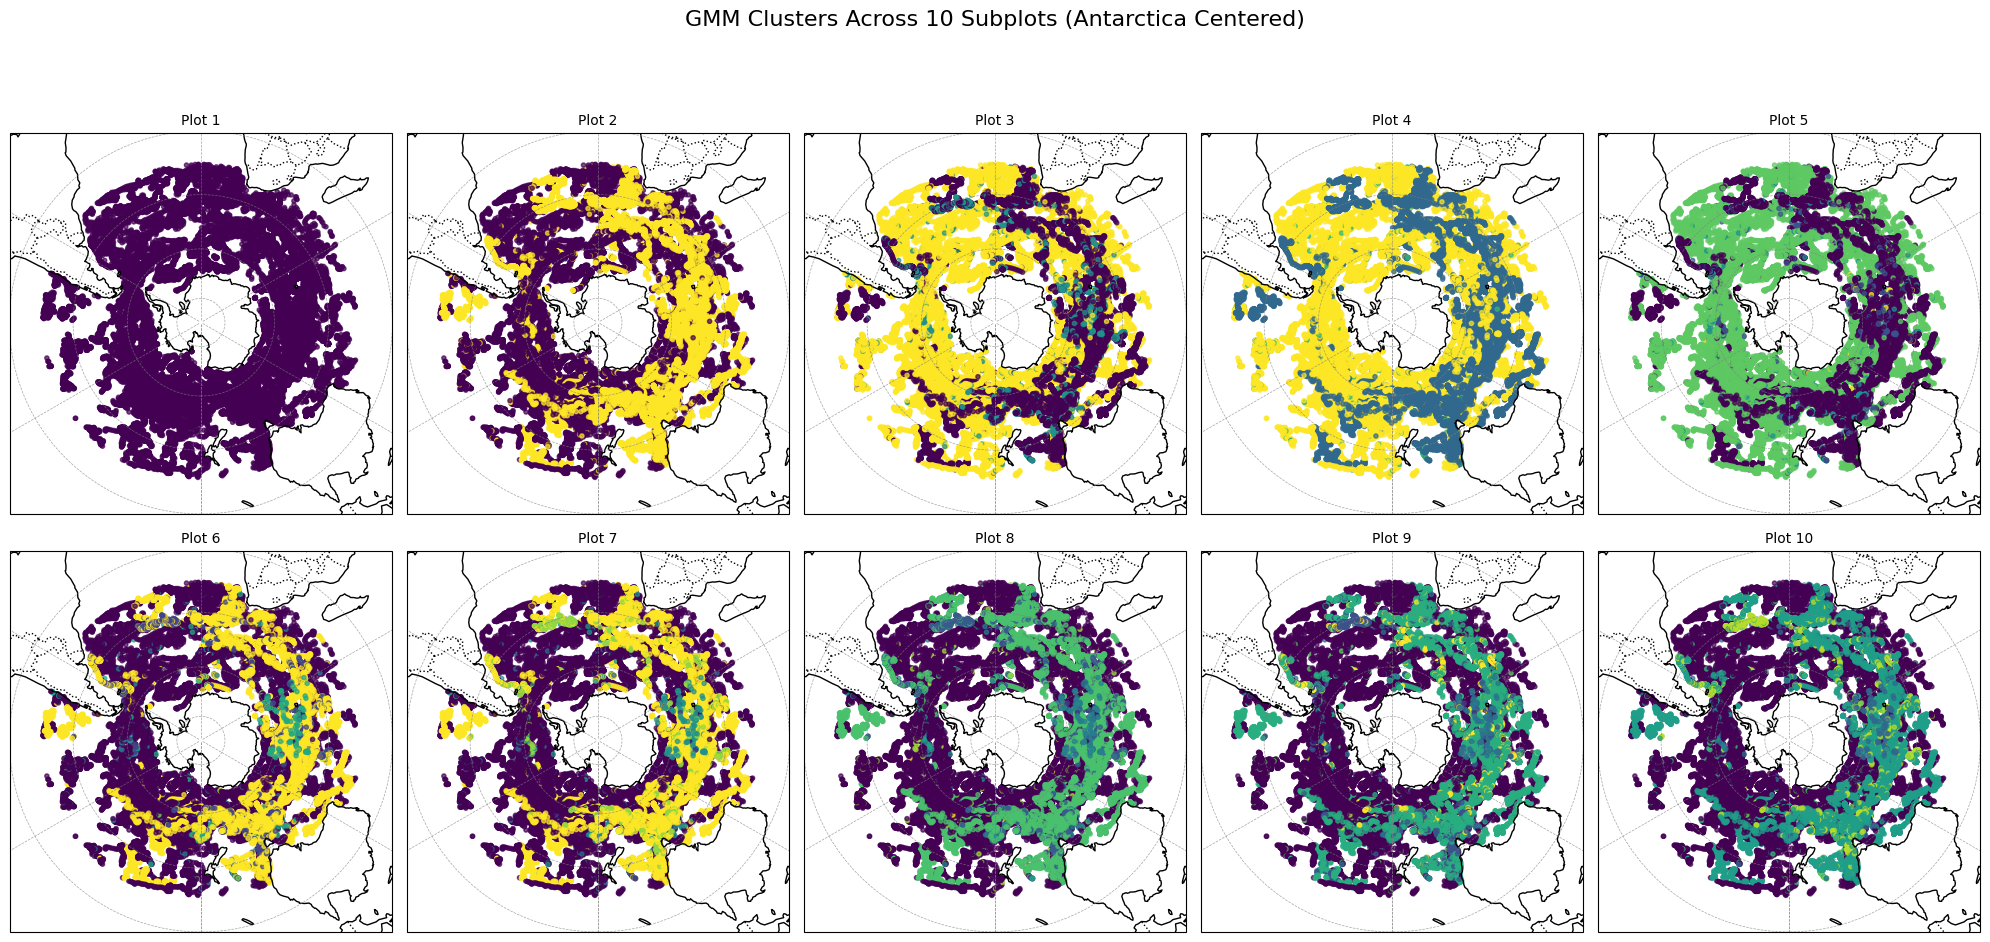

In [115]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Assume `chla_dropped` and `labels` are already defined
# Number of subplots
num_plots = N

# Create a figure with 10 subplots (2 rows and 5 columns as an example)
fig, axes = plt.subplots(
    nrows=2, ncols=5, 
    subplot_kw={'projection': ccrs.SouthPolarStereo()}, 
    figsize=(20, 10)
)

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Generate each subplot
for i, ax in enumerate(axes):
    ax.set_extent([-180, 180, -90, -20], crs=ccrs.PlateCarree())  # Define extent for better visualization

    # Add scatter points for the clusters
    scatter = ax.scatter(
        chla_dropped['LONGITUDE'],
        chla_dropped['LATITUDE'],
        c=plot_labels[i],
        cmap='viridis',
        alpha=0.7,
        marker='.',
        transform=ccrs.PlateCarree()
    )

    # Add features to the map
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')

    # Add subplot-specific title
    ax.set_title(f"Plot {i+1}", fontsize=10)

# Add a global title
fig.suptitle("GMM Clusters Across 10 Subplots (Antarctica Centered)", fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


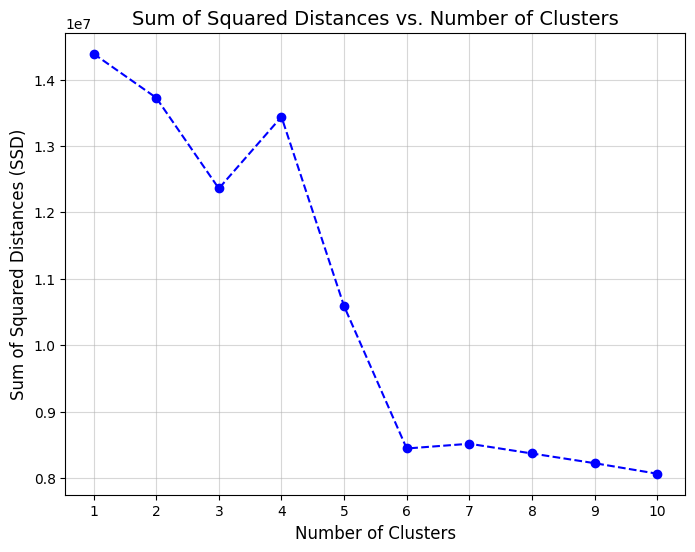

In [116]:
import matplotlib.pyplot as plt

# Assuming the 'ssd' list is already calculated in the previous step

# Plot the SSD against the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, N + 1), ssd, marker='o', linestyle='--', color='b')
plt.title('Sum of Squared Distances vs. Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Sum of Squared Distances (SSD)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(alpha=0.5)
plt.show()
